## GCP

### Getting data from Big Query

#### 1. Using Jupyter plugin

In [2]:
pip install --upgrade google-cloud-bigquery[pandas]

     |████████████████████████████████| 153kB 3.8MB/s 
ERROR: google-cloud-storage 1.10.0 has requirement google-cloud-core<0.29dev,>=0.28.0, but you'll have google-cloud-core 1.0.3 which is incompatible.
  Found existing installation: google-cloud-core 0.28.1
    Uninstalling google-cloud-core-0.28.1:
      Successfully uninstalled google-cloud-core-0.28.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext google.cloud.bigquery

In [4]:
%%bigquery
SELECT *
FROM `hsbc-datathon-sandbox.open_data_test_transfusion.transfusion`
LIMIT 10

,Recency__months_,Frequency__times_,Monetary__c_c__blood_,Time__months_,whether_he_she_donated_blood_in_March_2007
0,2,1,250,2,0
1,2,1,250,2,0
2,2,1,250,2,0
3,2,1,250,2,0
4,2,1,250,2,0
5,2,1,250,2,0
6,2,1,250,2,0
7,2,1,250,2,0
8,2,1,250,2,0
9,2,1,250,2,0


In [5]:
%%bigquery transfusion_head_ten
SELECT *
FROM `hsbc-datathon-sandbox.open_data_test_transfusion.transfusion`
LIMIT 10

In [6]:
transfusion_head_ten

,Recency__months_,Frequency__times_,Monetary__c_c__blood_,Time__months_,whether_he_she_donated_blood_in_March_2007
0,2,1,250,2,0
1,2,1,250,2,0
2,2,1,250,2,0
3,2,1,250,2,0
4,2,1,250,2,0
5,2,1,250,2,0
6,2,1,250,2,0
7,2,1,250,2,0
8,2,1,250,2,0
9,2,1,250,2,0


In [7]:
type(transfusion_head_ten)

pandas.core.frame.DataFrame

In [8]:
transfusion_head_ten.head(5)

,Recency__months_,Frequency__times_,Monetary__c_c__blood_,Time__months_,whether_he_she_donated_blood_in_March_2007
0,2,1,250,2,0
1,2,1,250,2,0
2,2,1,250,2,0
3,2,1,250,2,0
4,2,1,250,2,0


In [9]:
%%bigquery transfusion
SELECT 
    Recency__months_ as Recency,
    Frequency__times_ as Frequency,
    Monetary__c_c__blood_ as Monetary,
    Time__months_ as Time,
    whether_he_she_donated_blood_in_March_2007 as will_donate
FROM `hsbc-datathon-sandbox.open_data_test_transfusion.transfusion`
LIMIT 800

In [11]:
transfusion.head(10)

,Recency,Frequency,Monetary,Time,will_donate
0,2,1,250,2,0
1,2,1,250,2,0
2,2,1,250,2,0
3,2,1,250,2,0
4,2,1,250,2,0
5,2,1,250,2,0
6,2,1,250,2,0
7,2,1,250,2,0
8,2,1,250,2,0
9,2,1,250,2,0


In [12]:
transfusion.shape

(748, 5)

In [13]:
transfusion.describe()

,Recency,Frequency,Monetary,Time,will_donate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

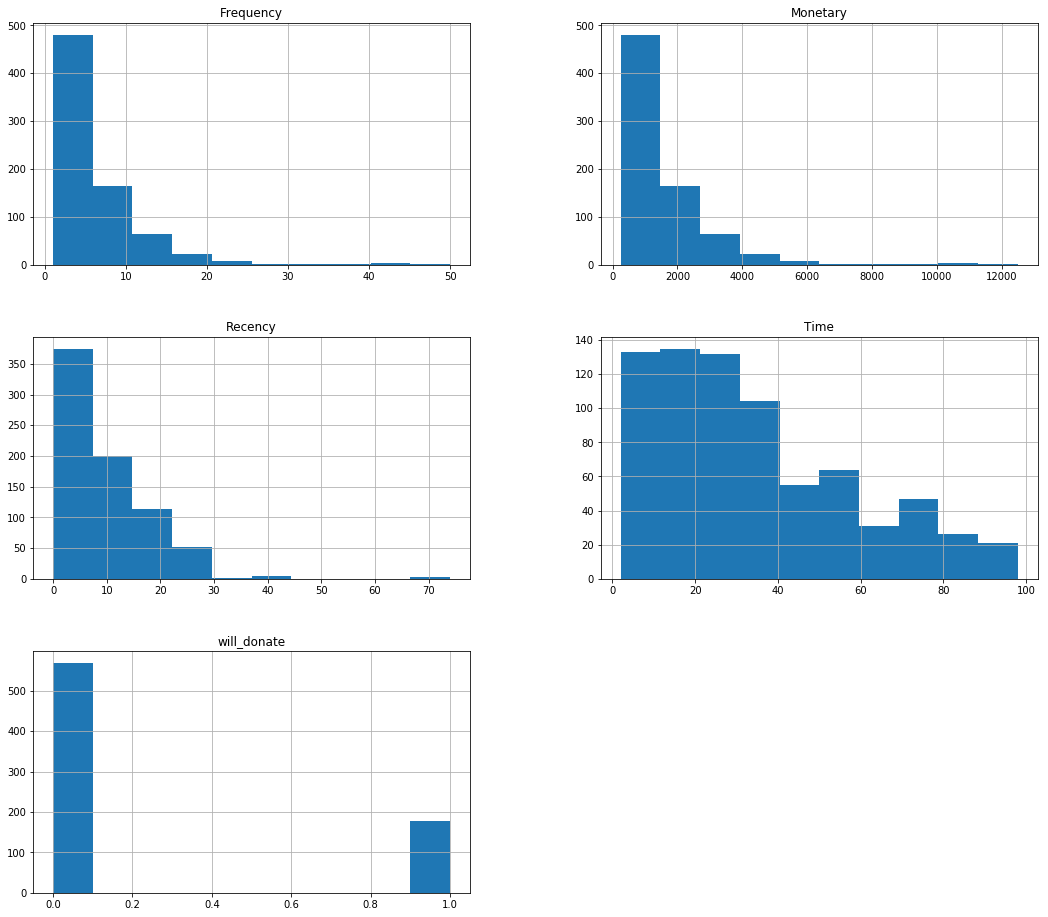

In [18]:
# histograms
transfusion.hist(figsize=(18,16))
plt.show()

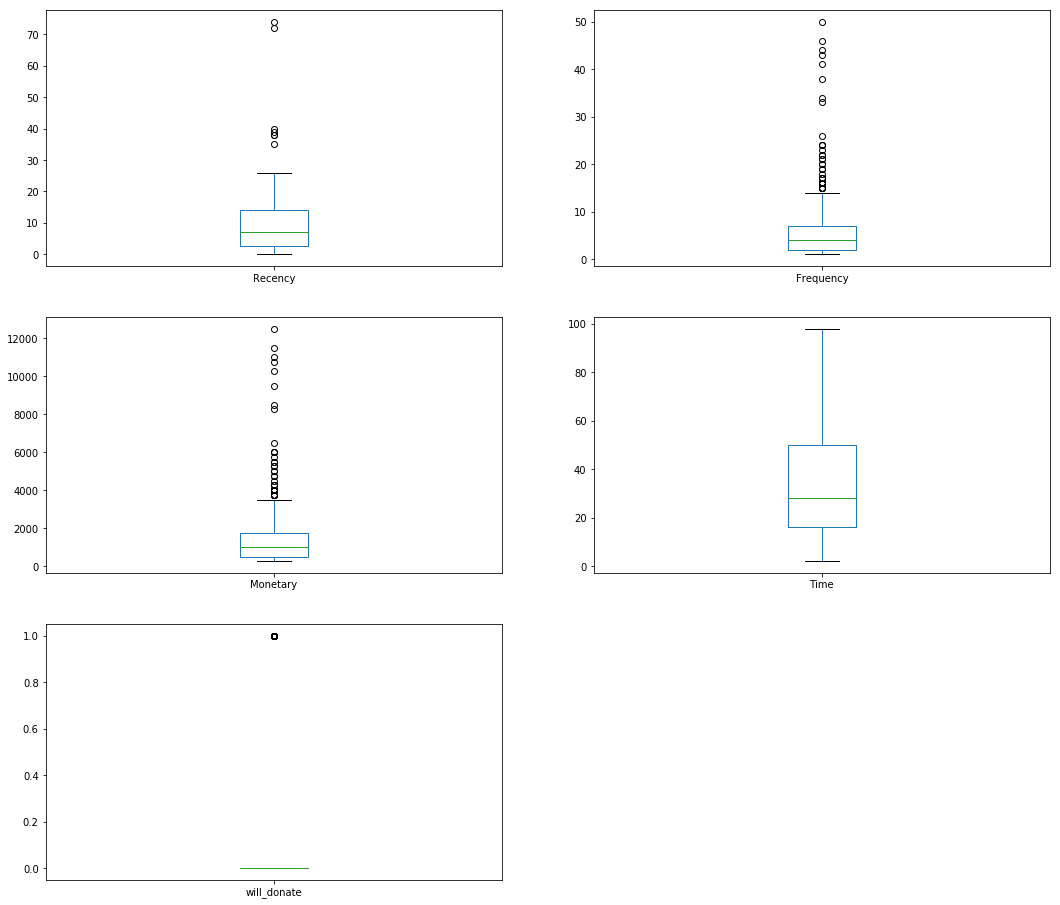

In [19]:
transfusion.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(18,16))
plt.show()


#### 2. Feeling Slow, use Big Data . Spark Big query connector